# Language Detection with NLP

In [31]:
#Importing Libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [32]:
# Loading the dataset
df = pd.read_csv(r"/content/drive/MyDrive/Language Detection/Language Detection.csv")
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [33]:
df.shape

(10337, 2)

In [34]:
#checking with Null Values
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [35]:
# value count for each language
df["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'English'),
  Text(1, 0, 'French'),
  Text(2, 0, 'Spanish'),
  Text(3, 0, 'Portugeese'),
  Text(4, 0, 'Italian'),
  Text(5, 0, 'Russian'),
  Text(6, 0, 'Sweedish'),
  Text(7, 0, 'Malayalam'),
  Text(8, 0, 'Dutch'),
  Text(9, 0, 'Arabic'),
  Text(10, 0, 'Turkish'),
  Text(11, 0, 'German'),
  Text(12, 0, 'Tamil'),
  Text(13, 0, 'Danish'),
  Text(14, 0, 'Kannada'),
  Text(15, 0, 'Greek'),
  Text(16, 0, 'Hindi')])

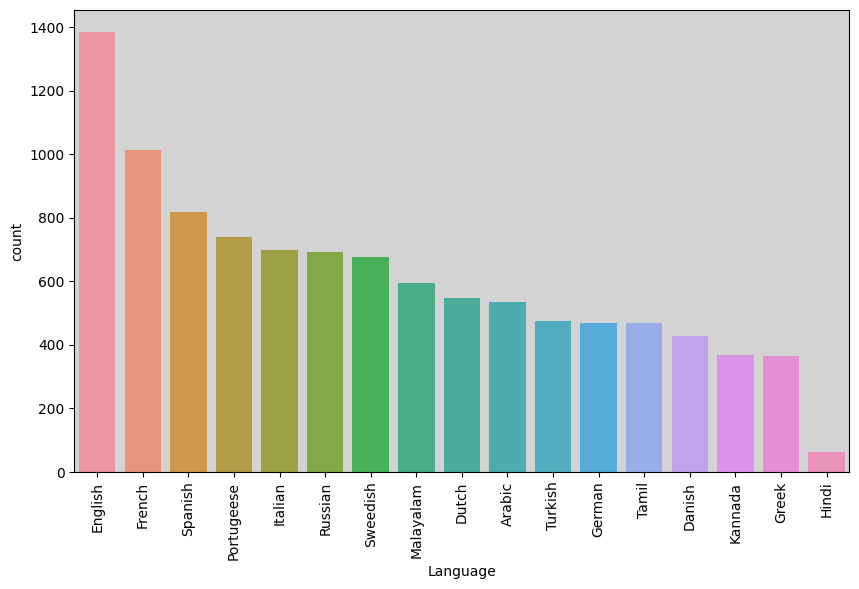

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x=df["Language"], order=df["Language"].value_counts(ascending=False).index)
plt.xticks(rotation=90)

In [42]:
# separating the independent and dependant features
X = df["Text"]
y = df["Language"]

# Data Pre-Processing

In [38]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [43]:
# converting categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
encode= LabelEncoder()
y = encode.fit_transform(y)
print(encode.classes_)

['Arabic' 'Danish' 'Dutch' 'English' 'French' 'German' 'Greek' 'Hindi'
 'Italian' 'Kannada' 'Malayalam' 'Portugeese' 'Russian' 'Spanish'
 'Sweedish' 'Tamil' 'Turkish']


In [44]:
# creating bag of words using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer()
X = bow.fit_transform(data_list).toarray()

# Model Building

In [45]:
#train test splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(8269, 34937) (2068, 34937)
(8269,) (2068,)


## Linear Model

In [46]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression()

#Training the Model
model_log.fit(x_train,y_train)

#predicting the Model
y_pred_log=model_log.predict(x_test)

#Evaluating the Model
from sklearn import metrics
f1_log =metrics.f1_score(y_test, y_pred_log,pos_label="postive",average="macro")
cm_log= metrics.confusion_matrix(y_test, y_pred_log)
print("F1_score:",f1_log)
print("Confusion Matrix:\n",cm_log)

F1_score: 0.9427325875657901
Confusion Matrix:
 [[104   0   0   0   0   0   0   0   0   0   0   0  11   0   0   0   0]
 [  0  66   0   1   0   1   0   0   1   0   0   0   0   0   3   0   0]
 [  0   0 108   1   3   0   0   0   0   0   0   0   2   0   2   0   1]
 [  0   0   1 269   2   1   0   0   1   0   0   0   1   0   0   0   0]
 [  0   0   0   0 201   0   0   0   2   0   0   0   2   1   1   0   0]
 [  0   0   0   0   0  90   0   0   1   0   0   0   1   0   0   0   1]
 [  0   0   0   1   0   0  73   0   0   0   0   0   4   0   0   0   0]
 [  0   0   0   0   0   0   0   9   0   0   0   0   3   0   0   0   0]
 [  0   0   0   3   0   0   0   0 136   0   0   0   2   1   0   0   0]
 [  0   0   0   0   0   0   0   0   1  66   0   0   5   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0 113   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   3   0   0 144   2   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 131   0   1   0   0]
 [  0   0   1   0   0   0   0

## Naive Bayes Model

In [47]:
#Naive Bayes Multinomial
from sklearn.naive_bayes import MultinomialNB
model_naive = MultinomialNB()

#Training the Model
model_naive.fit(x_train, y_train)
#predicting the Model
y_pred_naive = model_naive.predict(x_test)

#Evaluating the Model
from sklearn import metrics
f1_naive = metrics.f1_score(y_test, y_pred_naive,pos_label="postive",average="macro")
cm_naive= metrics.confusion_matrix(y_test, y_pred_naive)
print("F1_score:",f1_naive)
print("Confusion Matrix:\n",cm_naive)

F1_score: 0.9767357733466964
Confusion Matrix:
 [[113   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  69   0   0   0   0   0   0   1   0   0   0   0   0   2   0   0]
 [  0   0 114   2   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 273   1   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1 206   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1  92   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0  76   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  12   0   0   0   0   0   0   0   0   0]
 [  0   0   1   3   0   0   0   0 136   0   0   0   0   2   0   0   0]
 [  0   1   0   5   0   0   0   0   0  66   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0 114   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   2   0   0 145   0   2   0   0   0]
 [  0   0   0   6   0   0   0   0   0   0   0   0 126   0   0   0   0]
 [  0   0   0   2   1   0   0

## Ensemble Model

In [48]:
#AdaBosst Classifier
from sklearn.ensemble import AdaBoostClassifier
model_abc=AdaBoostClassifier()
#Training the Model
model_abc.fit(x_train,y_train)

#Predicting the Model
y_pred_abc=model_abc.predict(x_test)

#Evaluating the Model
from sklearn import metrics

f1_abc=metrics.f1_score(y_test,y_pred_abc,pos_label="positive",average="macro")

cm_abc=metrics.confusion_matrix(y_test,y_pred_abc)

print("F1_Score:",f1_abc)
print("Confuion Matrix:",cm_abc)

F1_Score: 0.18450716131481548
Confuion Matrix: [[  0   0   0   0 115   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  72   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 117   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 160 115   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 207   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  93   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1  46   0  31   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   3   0   0   9   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2 140   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  72   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 115   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1 149   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 132   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 153   0   0 



## Tree Model

In [49]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model_dtc=DecisionTreeClassifier(max_depth=2)

#Training the Model
model_dtc.fit(x_train,y_train)

#Predicting the Model
y_pred_dtc=model_dtc.predict(x_test)

#Evaluating the Model
from sklearn import metrics
f1_dtc=metrics.f1_score(y_test,y_pred_dtc,pos_label="positive",average="macro")
cm_dtc=metrics.confusion_matrix(y_test,y_pred_dtc)

print("F1_Score:",f1_dtc)
print("Confusion Matrix:",cm_dtc)

F1_Score: 0.10117647475796974
Confusion Matrix: [[  0   0   0   0 115   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  72   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 117   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 160 115   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 207   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  93   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1  77   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1  11   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2 140   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  72   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 115   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 149   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0 132   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 153   0   0

# XGBOOST

## Model Visualization

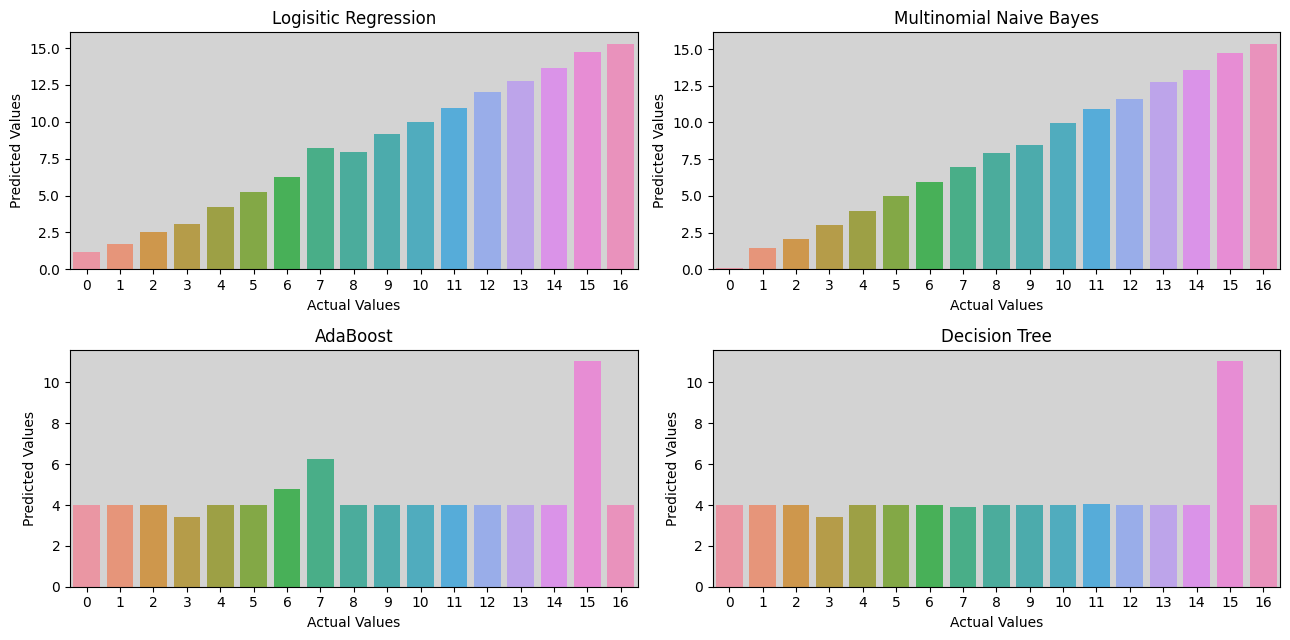

In [53]:
#plotting Actual and Predicting values
plt.figure(figsize=(13,6.5))
#Logistic Regression
plt.rcParams["axes.facecolor"]="lightgrey"
plt.subplot(2,2,1)
sns.barplot(x=y_test,y=y_pred_log,ci=None)
plt.title("Logisitic Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

#Naive Bayes
plt.rcParams["axes.facecolor"]="lightgrey"
plt.subplot(2,2,2)
sns.barplot(x=y_test,y=y_pred_naive,ci=None)
plt.title("Multinomial Naive Bayes")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")


#Ada Boost
plt.rcParams["axes.facecolor"]="lightgrey"
plt.subplot(2,2,3)
sns.barplot(x=y_test,y=y_pred_abc,ci=None)
plt.title("AdaBoost")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

#Decision Tree
plt.rcParams["axes.facecolor"]="lightgrey"
plt.subplot(2,2,4)
sns.barplot(x=y_test,y=y_pred_dtc,ci=None)
plt.title("Decision Tree")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()

1. From the above Plot we observe that **Logistic_Regression** and **Naive_Bayes** models gives more accurate predicted values compare with  Actual Values.
2. AdaBoost and Decision Tree models are fluctuating i.e., predicted values are not same as the Actual Values.

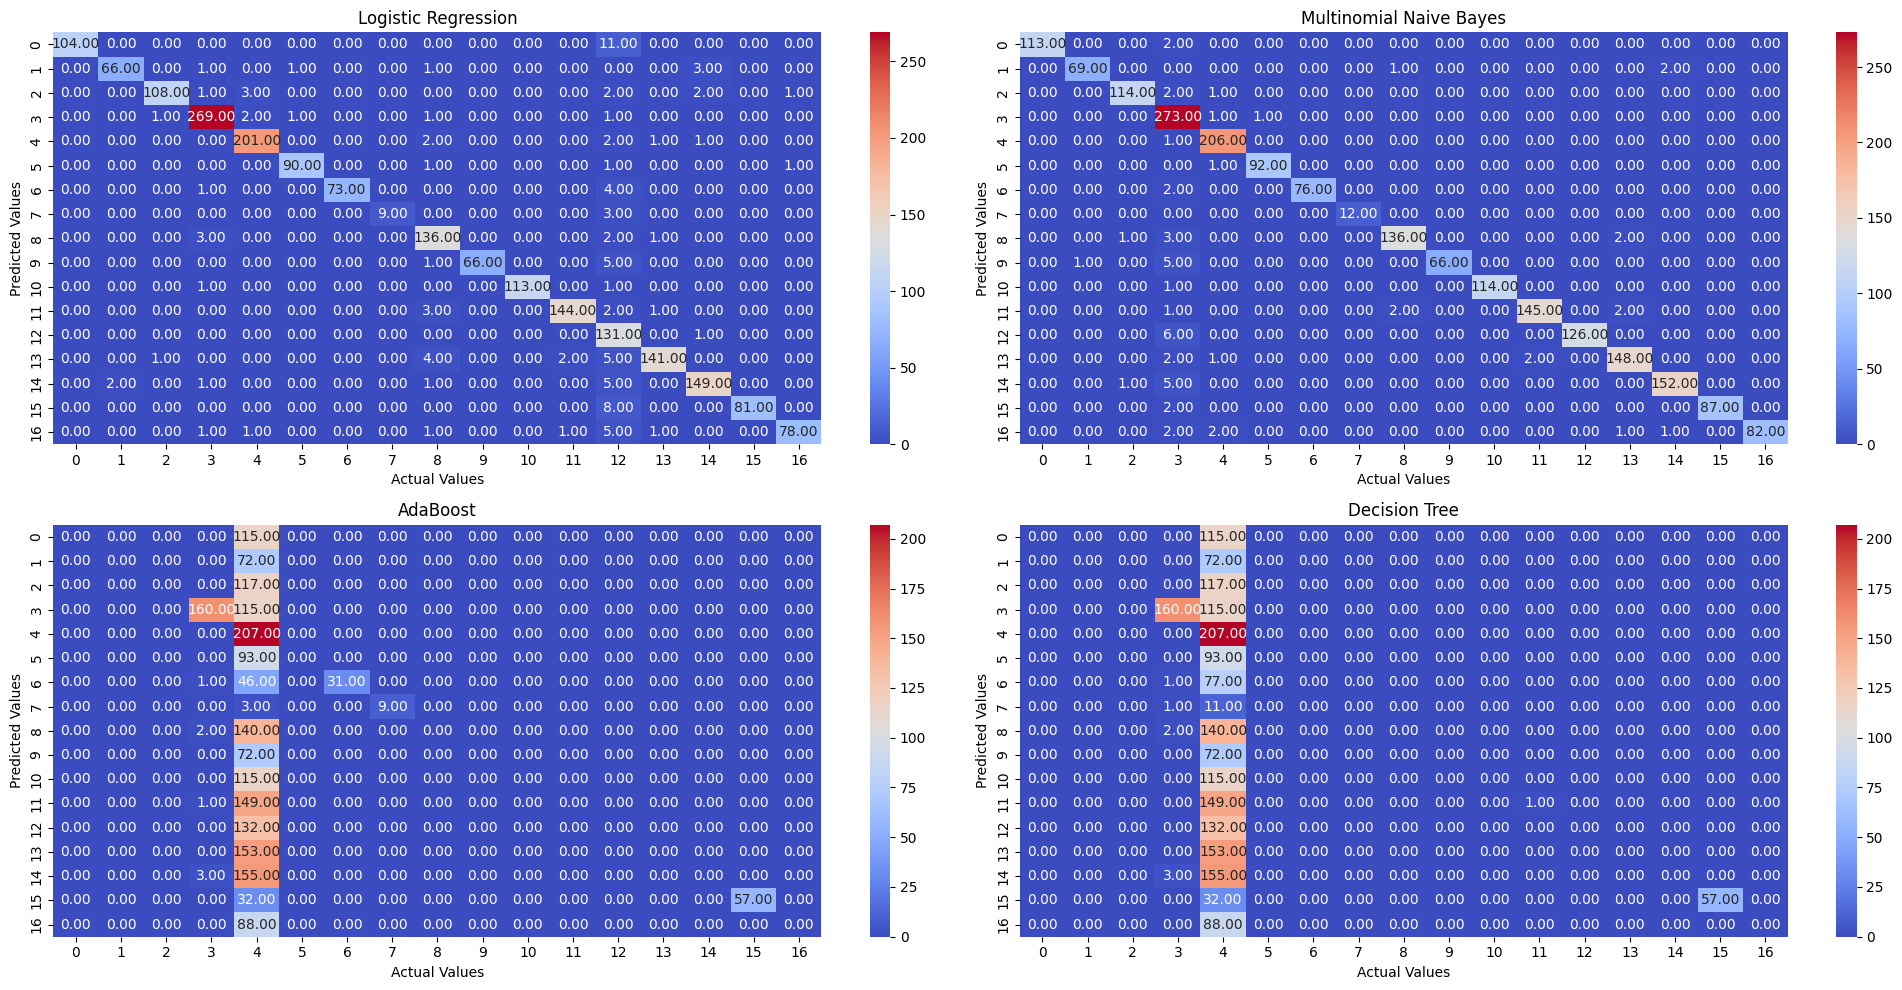

In [55]:
#Plotting the Heatmap on basis of Confusion Matrix
plt.figure(figsize=(20,10))
#Logistic Regression
plt.subplot(2,2,1)
sns.heatmap(cm_log, annot = True,cmap="coolwarm",fmt=".2f")
plt.title("Logistic Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

#Multiomial Naive Bayes
plt.subplot(2,2,2)
sns.heatmap(cm_naive, annot = True,cmap="coolwarm",fmt=".2f")
plt.title("Multinomial Naive Bayes")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

#AdaBoost
plt.subplot(2,2,3)
sns.heatmap(cm_abc, annot = True,cmap="coolwarm",fmt=".2f")
plt.title("AdaBoost")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

#Decision Tree
plt.subplot(2,2,4)
sns.heatmap(cm_dtc, annot = True,cmap="coolwarm",fmt=".2f")
plt.title("Decision Tree")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.tight_layout()

plt.show()

1. On the basis Heatmap of Confusion matrix, the Correlation between the Actual values and Predicted values of **Naive_Bayes** model is high compare to the other models.
2. Logistic model has next best Correlation between the Values.
3. AdaBoost and Decision Correlations are not good.

# Saving the Model

In [ ]:
#saving the models
import pickle
pickle.dump(model_naive,open("..\Lanugage Detection\model_naive.pkl","wb"))

# Model Deploying

In [ ]:
#Defining the Function for Prediciton
def Language_detection(text):
    x = bow.transform([text]).toarray()
    lang = model_naive.predict(x)
    lang = encode.inverse_transform(lang)
    print("The langauge is in",lang[0])

In [ ]:
#case 1:
Language_detection("Innomatics Research labs provides a community based knowledge portal for full stack and Data Science professionals")

The langauge is in English


In [ ]:
#case 2:
Language_detection( "Innomatics Research labs  fournit un portail de connaissances basé sur la communauté pour les professionnels de l'analyse et de la science des données")

The langauge is in French


In [ ]:
#case 3:
Language_detection( "توفر Innomatics Research labs  بوابة معرفية قائمة على المجتمع لمحترفي التحليلات وعلوم البيانات")

The langauge is in Arabic


In [ ]:
#case 4:
Language_detection( "Innomatics Research labs  proporciona un portal de conocimiento basado en la comunidad para profesionales de Analytics y Data Science.")

The langauge is in Spanish


In [ ]:
#case 5:
Language_detection(" “അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ അനലിറ്റിക്സ് വിദ്യ നൽകുന്നു")

The langauge is in Malayalam


In [ ]:
#case 6:
Language_detection( "Innomatics Research labs  - это портал знаний на базе сообщества для профессионалов в области аналитики и данных.")

The langauge is in Russian


# Conclusion
1. From the evaluation of models using the **F1-Score** metrics, **$ MultiNominal Naive Bayes $** performing well with  score **97.70** compared to other models.
2. Logistic Regression 2nd best performance model with score 93.81.

3. From the Heatmap of **Confusion Matrix** and bar plot basis on **Predicted Values**, these two models can be used to Deploy, also Execution time and gives most accuracte Results.